In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Loading the dataset

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
#NaN means not a number or missing values we have to repair or remove them but here we will remove them 

In [6]:
#So to drop our missing values 

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [9]:
# Transform the data
# before we apply our k-means clustering algorithm we need to standardize the data as our data set contains features that have been measured in their own units and have their own data ranges some features may end up having more influence over the final results compared to others to reduce this impact we need to take each feature subtract the mean of that feature from each value and then divide it by the feature standard deviation

In [10]:
scalar = StandardScaler()

In [11]:
df[['MinTemp_T', 'MaxTemp_T', 'Rainfall_T', 'Evaporation_T', 'Sunshine_T', 'WindGustSpeed_T', 'WindSpeed9am_T', 'WindSpeed3pm_T', 'Humidity9am_T', 'Humidity3pm_T', 'Pressure9am_T', 'Pressure3pm_T', 'Cloud9am_T', 'Cloud3pm_T', 'Temp9am_T', 'Temp3pm_T']] = scalar.fit_transform(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [12]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am_T,WindSpeed3pm_T,Humidity9am_T,Humidity3pm_T,Pressure9am_T,Pressure3pm_T,Cloud9am_T,Cloud3pm_T,Temp9am_T,Temp3pm_T
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,-1.162355,0.025055,-2.477924,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,0.400721,-0.092452,-1.937767,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1.723325,-0.562482,-1.289578,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,-1.162355,-1.620048,-1.559657,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,0.160248,-0.797496,-2.531940,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,-0.801645,0.025055,-0.155248,-0.871521,-0.483335,-0.625191,-1.516445,-1.256603,0.958451,1.402719
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,-0.320699,-1.032511,-0.533358,-1.069571,-0.382022,-0.523311,0.986113,-1.634357,1.004127,1.358837
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,0.160248,-1.032511,-1.073515,-1.317135,-0.280710,-0.435985,-1.516445,-1.634357,1.004127,1.373465
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,-0.801645,-0.327467,-0.209264,0.415808,-0.338603,-0.596082,-1.158937,-1.256603,1.004127,0.949270


In [13]:
#CLUSTERING OF DATA
#Identifying optimum number of clusters

In [14]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

#generate the elbow plot
    fig =plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Pyth

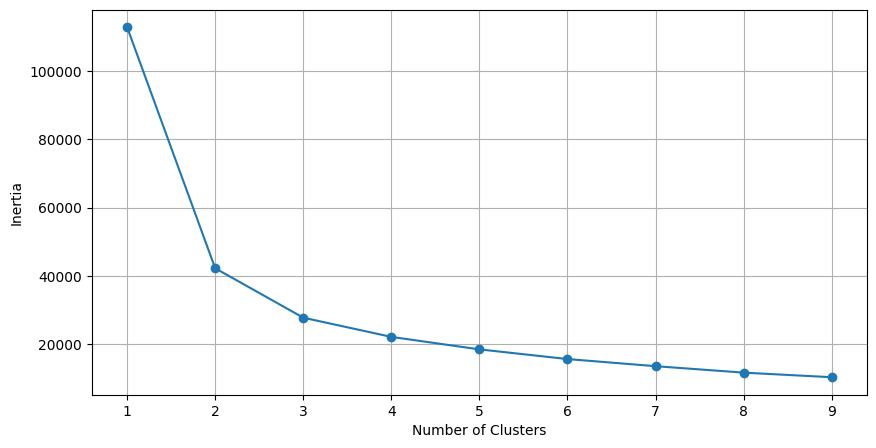

In [15]:
optimise_k_means(df[['MinTemp_T', 'MaxTemp_T']], 10)

In [16]:
#Applying K means clustering

In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(df[['MinTemp_T', 'MaxTemp_T']])

C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
df['kmeans_3'] = kmeans.labels_

In [21]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm_T,Humidity9am_T,Humidity3pm_T,Pressure9am_T,Pressure3pm_T,Cloud9am_T,Cloud3pm_T,Temp9am_T,Temp3pm_T,kmeans_3
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,0.025055,-2.477924,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,-0.092452,-1.937767,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,1
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,-0.562482,-1.289578,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,1
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,-1.620048,-1.559657,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,1
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,-0.797496,-2.531940,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,0.025055,-0.155248,-0.871521,-0.483335,-0.625191,-1.516445,-1.256603,0.958451,1.402719,1
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,-1.032511,-0.533358,-1.069571,-0.382022,-0.523311,0.986113,-1.634357,1.004127,1.358837,1
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,-1.032511,-1.073515,-1.317135,-0.280710,-0.435985,-1.516445,-1.634357,1.004127,1.373465,1
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,-0.327467,-0.209264,0.415808,-0.338603,-0.596082,-1.158937,-1.256603,1.004127,0.949270,1


In [23]:
#Plotting the results

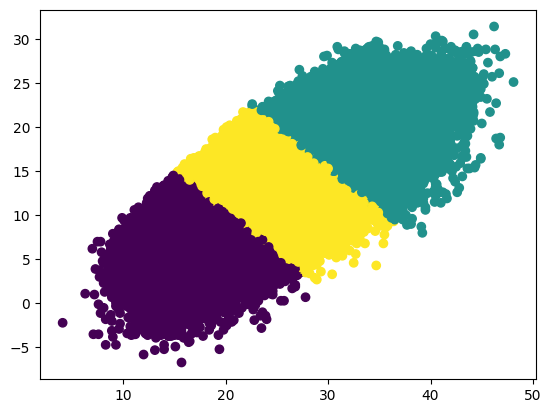

In [25]:
plt.scatter(x=df['MaxTemp'], y=df['MinTemp'], c=df['kmeans_3'])
plt.show()

In [26]:
#creating multiple clusters

In [27]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['MinTemp', 'MaxTemp']])
    df[f'KMeans_{k}'] = kmeans.labels_

C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASH CHAUDHARY\AppData\Local\Programs\Python\Pyth

In [28]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am_T,Cloud3pm_T,Temp9am_T,Temp3pm_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,-0.801428,0.254411,1.278186,1.563621,1,0,1,0,3,3
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,-1.158937,-1.256603,0.318980,0.627467,1,0,1,0,1,4
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,-1.158937,0.632165,1.597921,1.783032,1,0,1,0,3,3
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,-1.158937,0.254411,1.658823,1.885424,1,0,1,0,3,3
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,-1.158937,0.632165,2.343970,2.177972,1,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,-1.516445,-1.256603,0.958451,1.402719,1,0,1,0,3,3
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,0.986113,-1.634357,1.004127,1.358837,1,0,1,0,3,3
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,-1.516445,-1.634357,1.004127,1.373465,1,0,1,0,3,3
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,-1.158937,-1.256603,1.004127,0.949270,1,0,1,0,3,3
